t-statistic: 146.03754927232626
p-value: 0.0
Reject the null hypothesis. There is a significant difference between fixed acidity and volatile acidity.


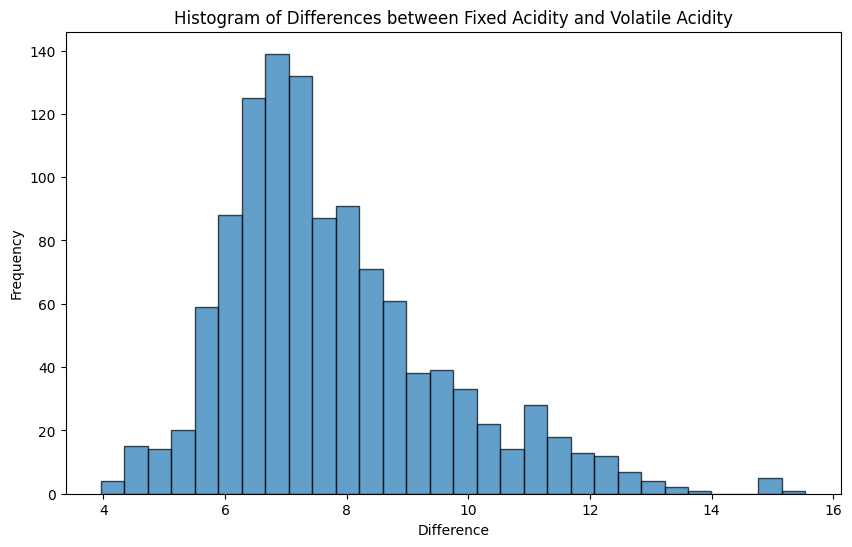

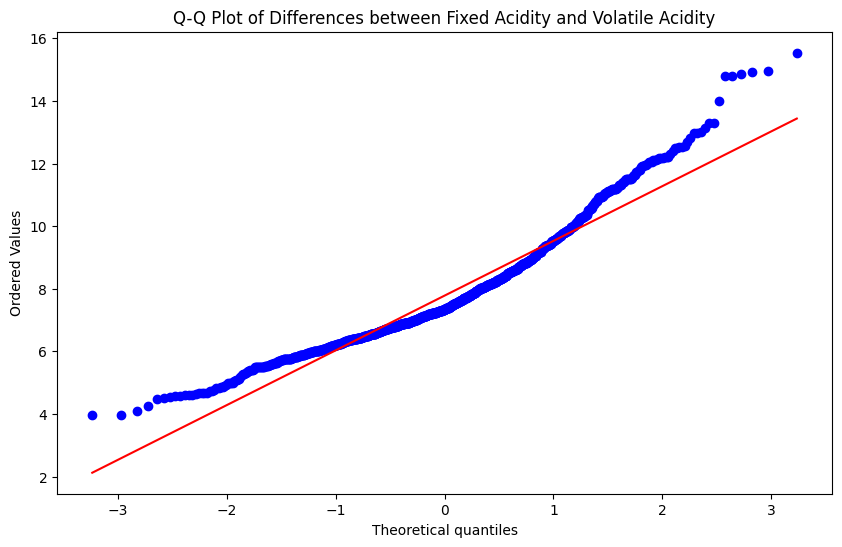

In [75]:
# Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('wine.csv')

# Task 1: Paired Data Analysis
# ----------------------------
## Problem and Data
"""
In this analysis, we are comparing the fixed acidity and volatile acidity in the wine dataset.
Our research question is: Is there a significant difference between fixed acidity and volatile acidity?
We will use a paired t-test to answer this question.
"""

## Compute Differences
data['difference'] = data['fixed acidity'] - data['volatile acidity']

## Compute Mean and Standard Deviation of Differences
mean_difference = np.mean(data['difference'])
std_difference = np.std(data['difference'], ddof=1)  # ddof=1 for sample standard deviation
n = len(data['difference'])  # Number of pairs

## Calculate the t-statistic using the formula
t_stat = mean_difference / (std_difference / np.sqrt(n))

## Degrees of Freedom
df = n - 1

## Calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), df) * 2  # Two-tailed test

## Print results
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

## Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between fixed acidity and volatile acidity.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between fixed acidity and volatile acidity.")

# Assumptions of the Paired t-Test
"""
- **Normality:** The differences between paired observations should be approximately normally distributed.
- **Independence:** The pairs of observations should be independent of each other.

Consequences and Remedies:
- **Normality Violation:** If the differences are not normally distributed, the results of the paired t-test may not be reliable. 
 A possible remedy is to use a non-parametric test such as the Wilcoxon signed-rank test.
- **Independence Violation:** If the pairs are not independent, the test results may be biased. 
 This can be addressed by ensuring proper experimental design or using more complex statistical models that account for dependence.
"""

# Visualization: Histogram of Differences
plt.figure(figsize=(10, 6))
plt.hist(data['difference'], bins=30, edgecolor='k', alpha=0.7, )
plt.title('Histogram of Differences between Fixed Acidity and Volatile Acidity')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# Visualization: Q-Q Plot of Differences
plt.figure(figsize=(10, 6))
stats.probplot(data['difference'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Differences between Fixed Acidity and Volatile Acidity')
plt.show()


F-statistic: 82.74705840458925
p-value: 3.399895743015832e-74
Reject the null hypothesis. There is a significant difference in alcohol content among different quality ratings.


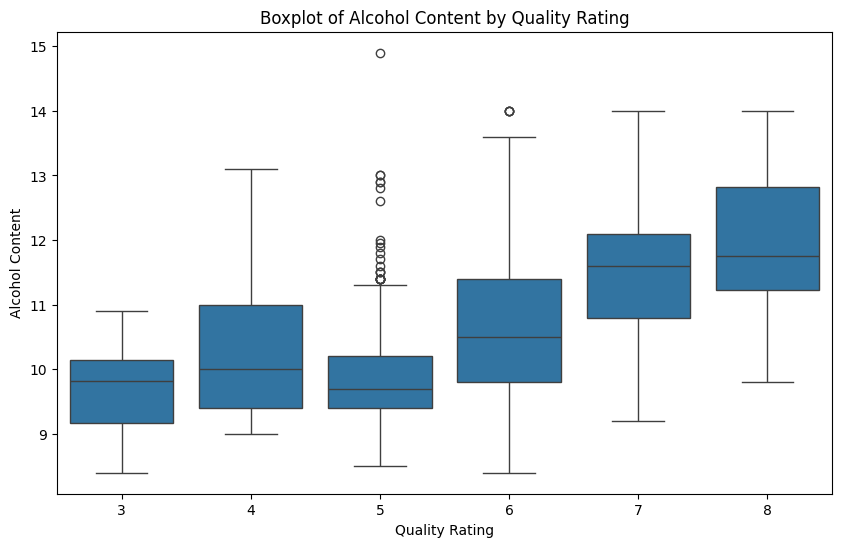

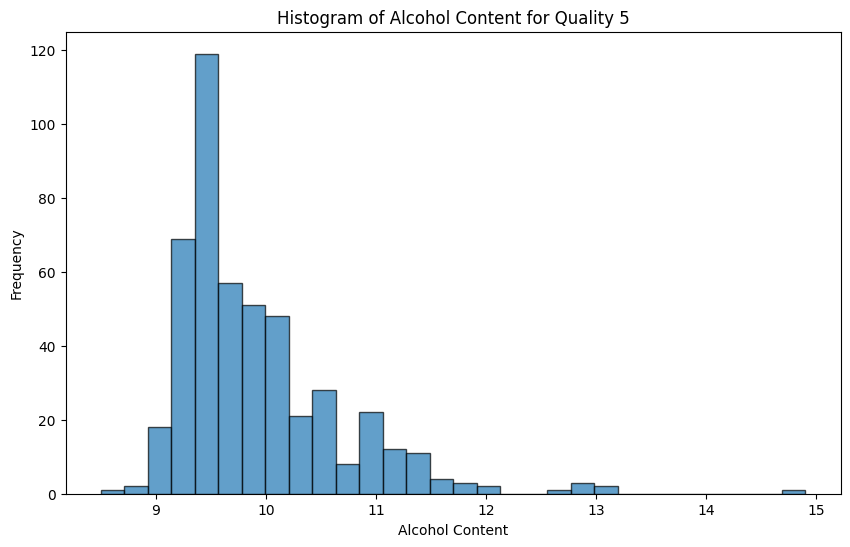

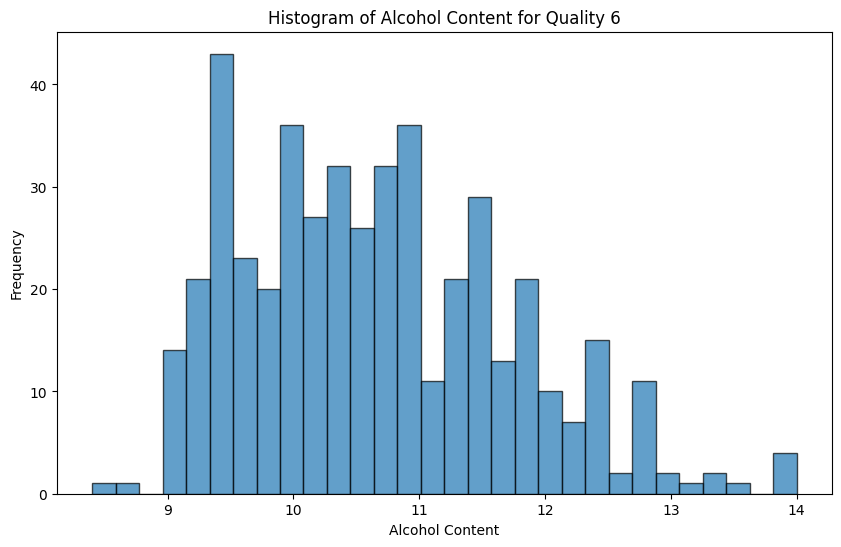

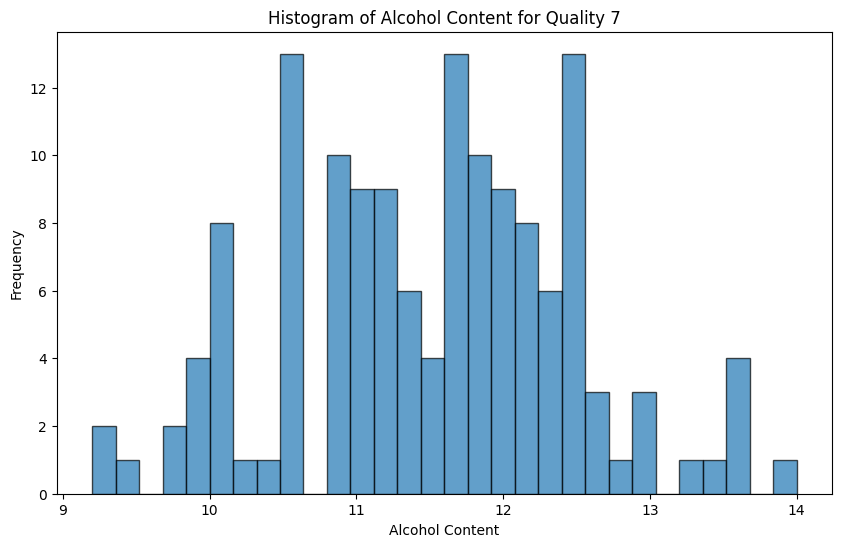

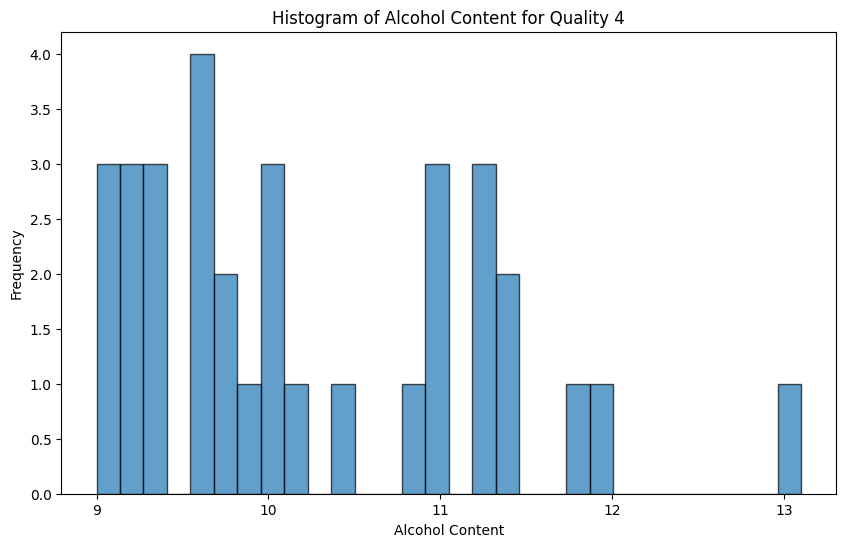

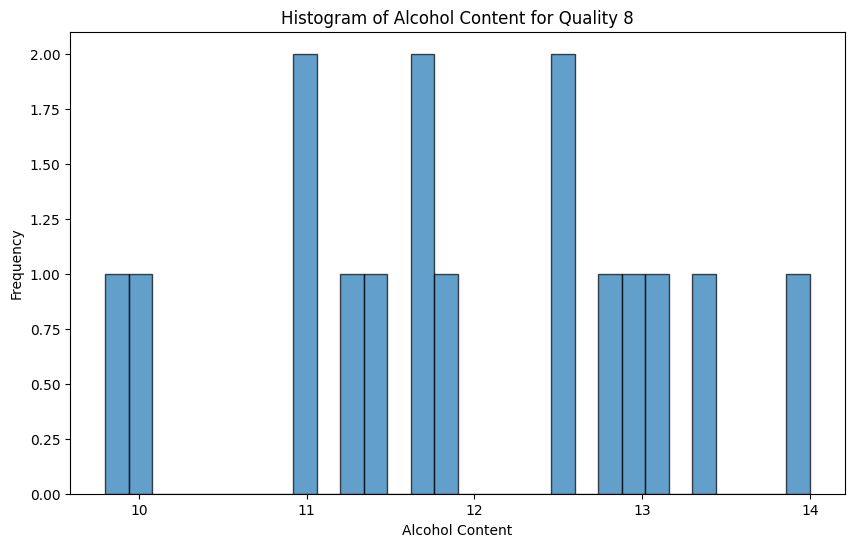

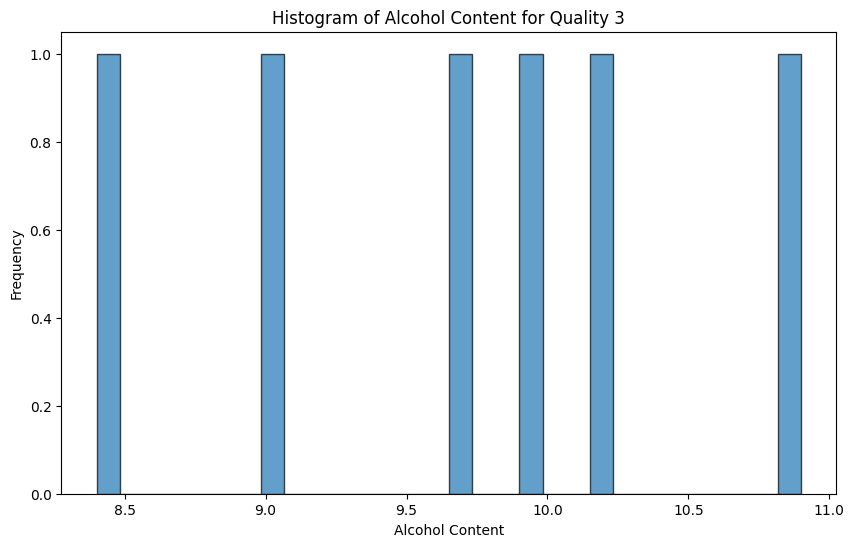

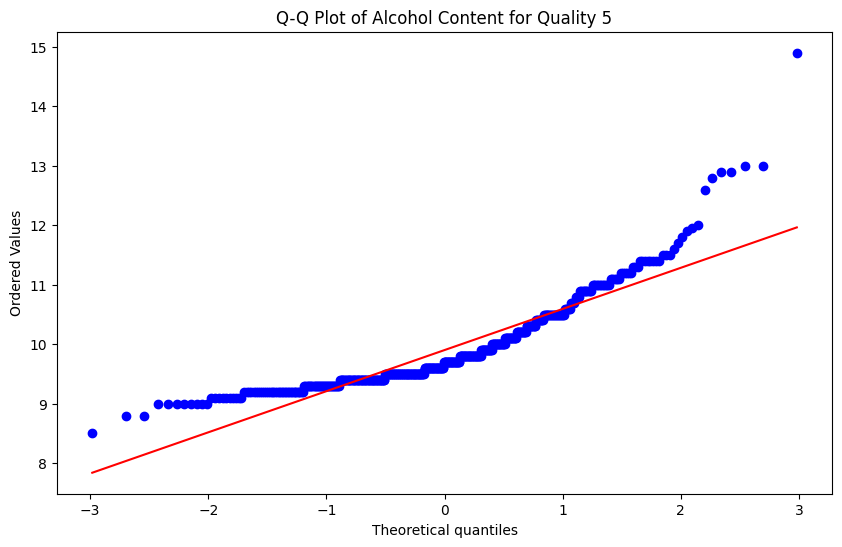

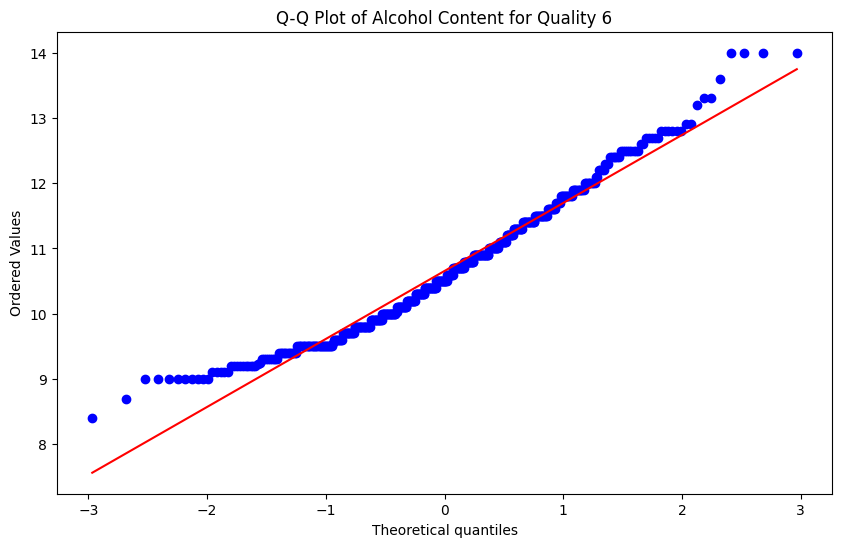

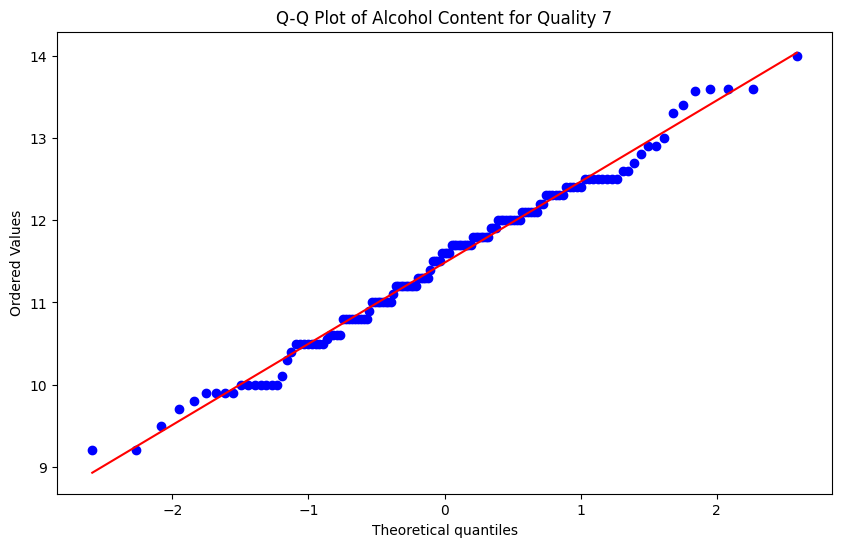

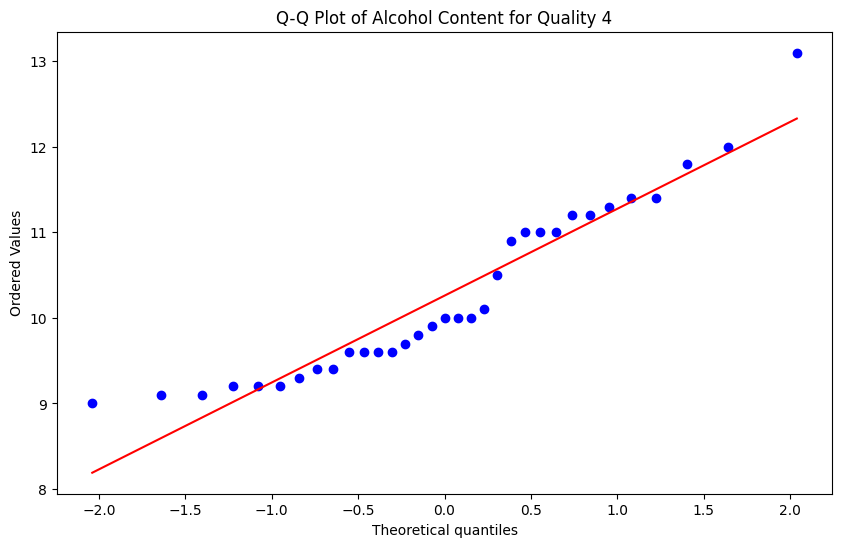

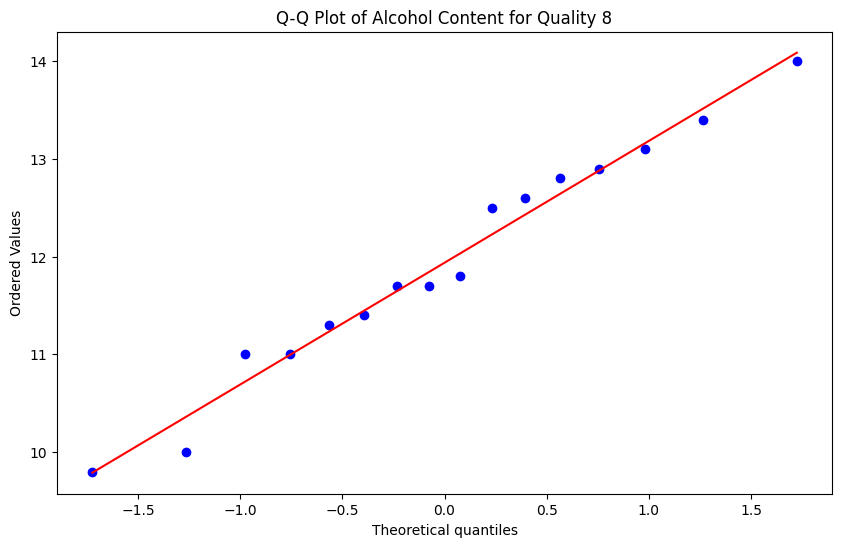

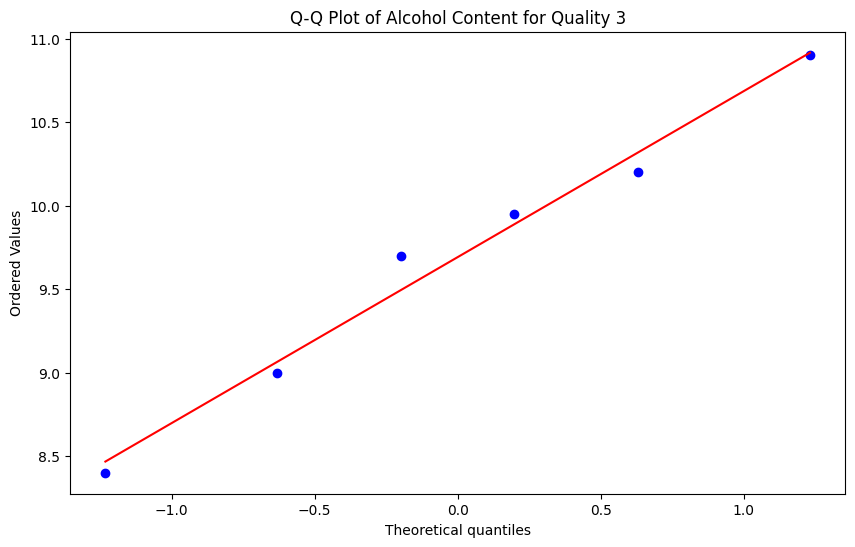

In [72]:
# Task 2: Multiple Population Means Analysis
# ------------------------------------------
## Problem and Data
"""
We are examining whether there are significant differences in alcohol content among wines with different quality ratings.
Our research question is: Is there a significant difference in alcohol content among different quality ratings?
We will use a one-way ANOVA to answer this question.
"""

## One-way ANOVA
anova_result = stats.f_oneway(
    data[data['quality'] == 3]['alcohol'],
    data[data['quality'] == 4]['alcohol'],
    data[data['quality'] == 5]['alcohol'],
    data[data['quality'] == 6]['alcohol'],
    data[data['quality'] == 7]['alcohol'],
    data[data['quality'] == 8]['alcohol']
)

## Print results
print(f'F-statistic: {anova_result.statistic}')
print(f'p-value: {anova_result.pvalue}')

## Interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in alcohol content among different quality ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in alcohol content among different quality ratings.")

# Assumptions of One-Way ANOVA
"""
- **Normality:** The distribution of the residuals should be approximately normal within each group.
- **Homogeneity of Variances:** The variances among the groups should be approximately equal.
- **Independence:** The observations should be independent of each other.

Consequences and Remedies:
- **Normality Violation:** If the residuals are not normally distributed, the results of ANOVA may not be reliable. Possible remedies include data transformation or using a non-parametric test such as the Kruskal-Wallis test.
- **Homogeneity of Variances Violation:** If the variances are not equal, it can affect the Type I error rate. Remedies include using Welch’s ANOVA or transforming the data.
- **Independence Violation:** If observations are not independent, it can lead to biased results. This can be addressed by improving experimental design or using more complex models that account for dependence.
"""

# Visualization: Boxplot of Alcohol Content by Quality Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Boxplot of Alcohol Content by Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Alcohol Content')
plt.show()

# Visualization: Histograms for Each Quality Group
quality_groups = data['quality'].unique()
for quality in quality_groups:
    plt.figure(figsize=(10, 6))
    plt.hist(data[data['quality'] == quality]['alcohol'], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Alcohol Content for Quality {quality}')
    plt.xlabel('Alcohol Content')
    plt.ylabel('Frequency')
    plt.show()

# Visualization: Q-Q Plots for Each Quality Group
for quality in quality_groups:
    plt.figure(figsize=(10, 6))
    stats.probplot(data[data['quality'] == quality]['alcohol'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Alcohol Content for Quality {quality}')
    plt.show()

W-statistic: 0.6009493657992984
p-value: 0.699255112520657
Fail to reject the null hypothesis. There is no significant difference in the variances of pH values among different quality ratings.


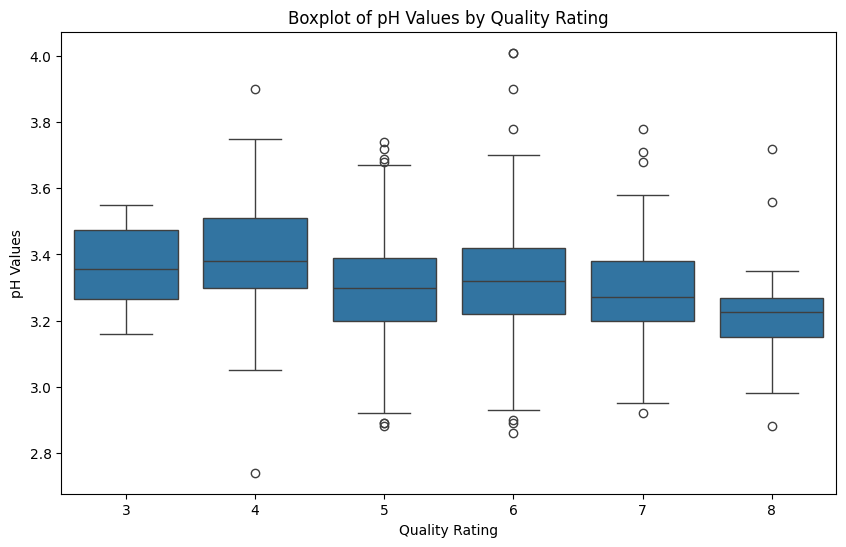

In [67]:
# Task 3: Variance Comparison Analysis
# ------------------------------------
## Problem and Data
"""
We are investigating whether there are significant differences in the variances of pH values among wines with different quality ratings.
Our research question is: Is there a significant difference in the variances of pH values among different quality ratings?
We will use Levene's test to answer this question.
"""

## Levene's Test
levene_result = stats.levene(
    data[data['quality'] == 3]['pH'],
    data[data['quality'] == 4]['pH'],
    data[data['quality'] == 5]['pH'],
    data[data['quality'] == 6]['pH'],
    data[data['quality'] == 7]['pH'],
    data[data['quality'] == 8]['pH']
)

## Print results
print(f'W-statistic: {levene_result.statistic}')
print(f'p-value: {levene_result.pvalue}')

## Interpretation
if levene_result.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the variances of pH values among different quality ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the variances of pH values among different quality ratings.")

# Assumptions of Levene's Test
"""
- **Independence:** The observations should be independent of each other.
- **Equality of Variances:** Levene's test specifically checks for the equality of variances.

Consequences and Remedies:
- **Independence Violation:** If the observations are not independent, the results of Levene's test may be biased. This can be addressed by ensuring proper experimental design.
- **Equality of Variances Violation:** If variances are unequal, it affects the assumption of homogeneity of variances in ANOVA. Remedies include transforming the data or using more robust statistical methods that do not assume equal variances.
"""

# Visualization: Boxplot of pH Values by Quality Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=data)
plt.title('Boxplot of pH Values by Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('pH Values')
plt.show()

Please find the link here:
https://www.loom.com/share/d931365374414a21abfb46304aa93785?sid=7386f024-4db5-4d6d-8a92-a579cfe2f59a
https://www.loom.com/share/043b8d4ad9d34ae8a9c0cf68c9b69de7?sid=a67349a3-44c0-4a50-aa98-d5d294728130
https://www.loom.com/share/fee7962eba8a4b10b138ad9dfd234197?sid=b3999b53-e452-4f03-be6a-a430c913c969